In [1]:
import numpy as np
from scipy.stats import multivariate_normal     # for generating pdf
import random
import matplotlib.pyplot as plt



def em_alg(samples, iterations, k):





    means = np.zeros((k, samples.shape[1]))
    cov = np.zeros((k, k, k))
    n_samples = len(samples)
    pi_k = np.zeros((k, 1))

    for i in range(k):
        means[i] = random.choice(samples)
        cov[i] = np.cov(np.transpose(samples))
        pi_k[i] = 1/(k+1)


    for n in range(iterations):

        #E-Step
        r_nk = np.zeros((n_samples, k))
        for s in range(k):
            r_nk[:, s] = pi_k[s] * multivariate_normal.pdf(samples, means[s], cov[s])
        r_nk /= np.sum(r_nk, axis =1, keepdims=True)



        #M-Step
        R_k = np.sum(r_nk, axis=0)
        pi_k = R_k / n_samples
        for y in range(k):
            means[y] = np.sum(r_nk[:, y].reshape((-1, 1)) * samples, axis=0) / R_k[y]
            diff = samples - means[y]
            cov[y] = (r_nk[:, y].reshape((-1, 1, 1)) * np.matmul(diff[:, :, np.newaxis], diff[:, np.newaxis, :])).sum(axis=0) / R_k[y]



     
        
        #Plot
        if((n +1)%(iterations/10) == 0 or n==3 or n==5):
            x1 = np.linspace(-4,11,200)  
            x2 = np.linspace(-4,11,200)
            X, Y = np.meshgrid(x1,x2)
            pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
            pos[:, :, 0] = X; pos[:, :, 1] = Y  

                
            
            plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
            plt.scatter(samples[:,0], samples[:,1], marker='o')  

            for c in range(k):
                plt.contour(X, Y, multivariate_normal(means[c], cov[c]).pdf(pos), colors="r", alpha = 0.5) 
         
            plt.axis('equal')                                                                  # making both the axis equal
            plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
            plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
            plt.title('Iteration ' +str(n), fontsize=22)                                            # Title of the plot
            plt.grid()                                                                         # displaying gridlines
            plt.show()





C:\Users\meikf\AppData\Local\Temp\ipykernel_13872\3636391351.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = 250)


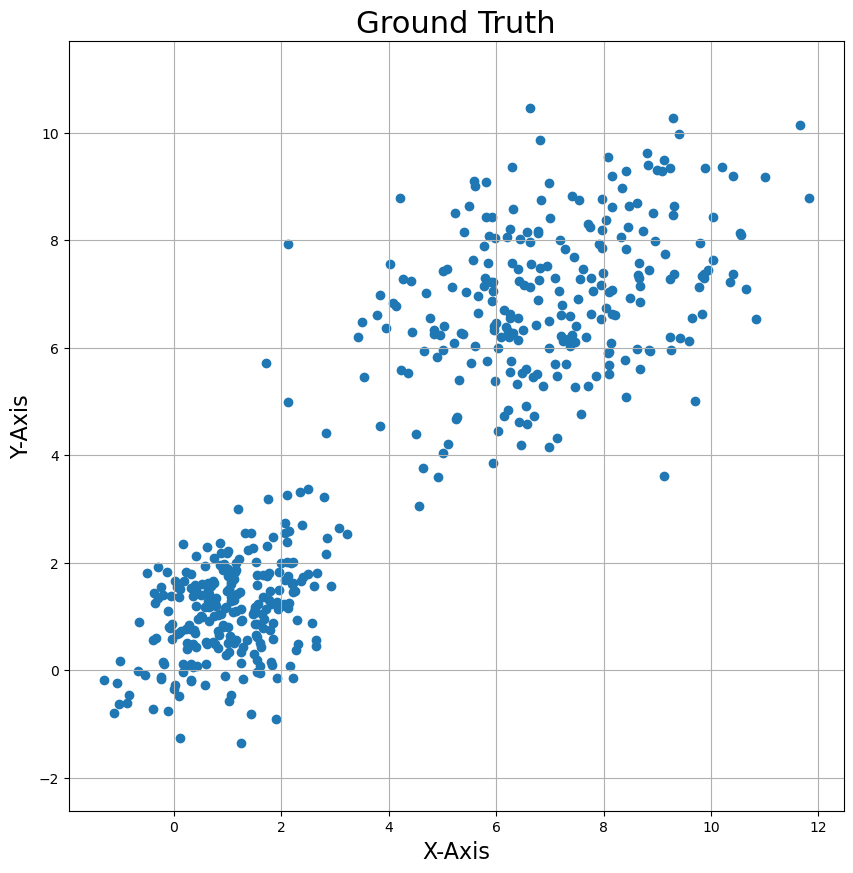

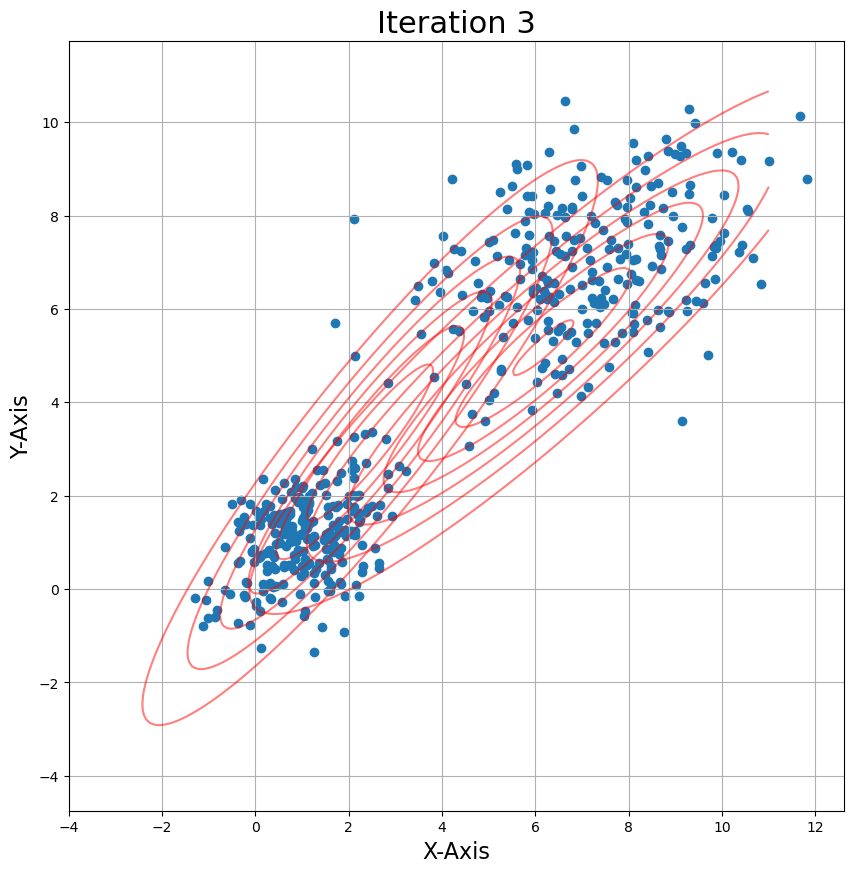

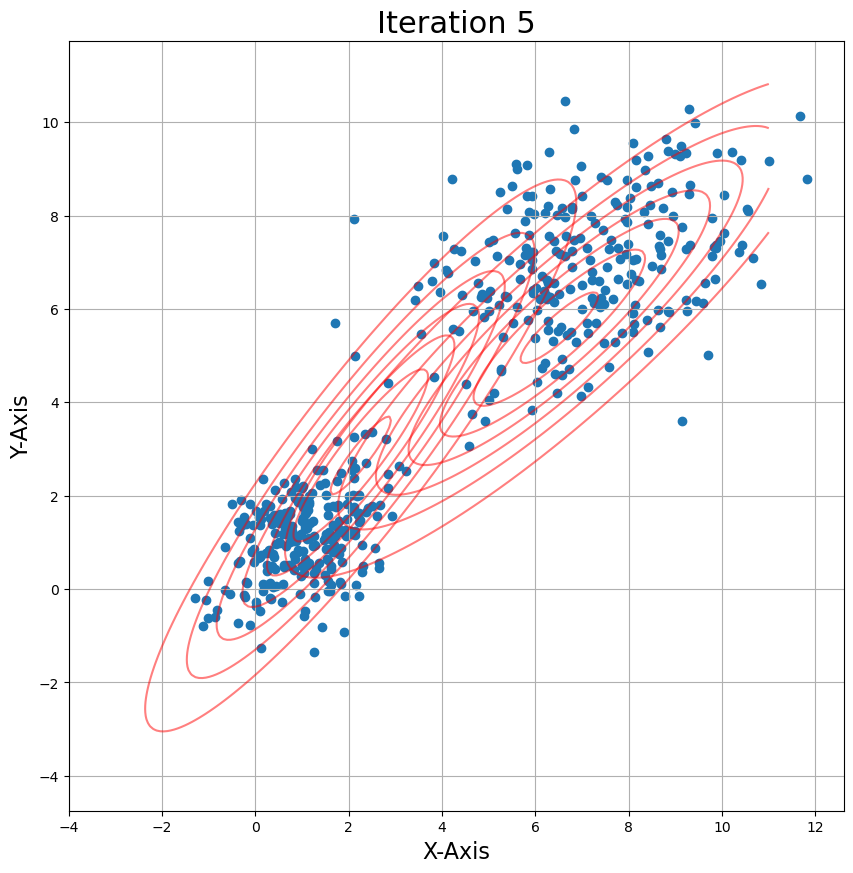

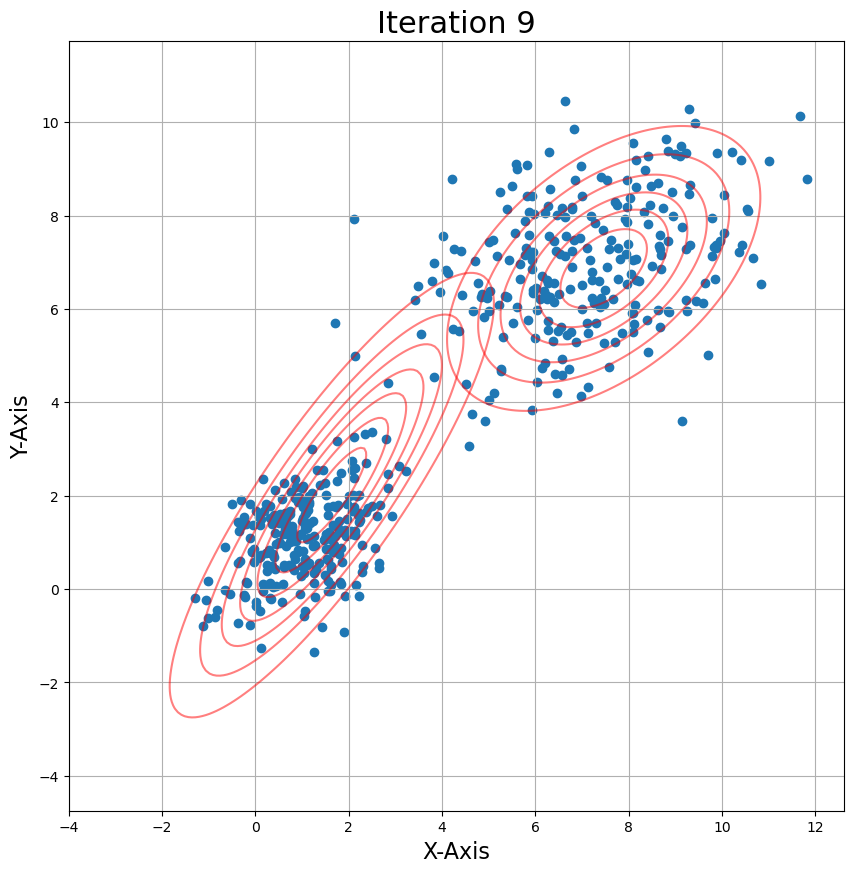

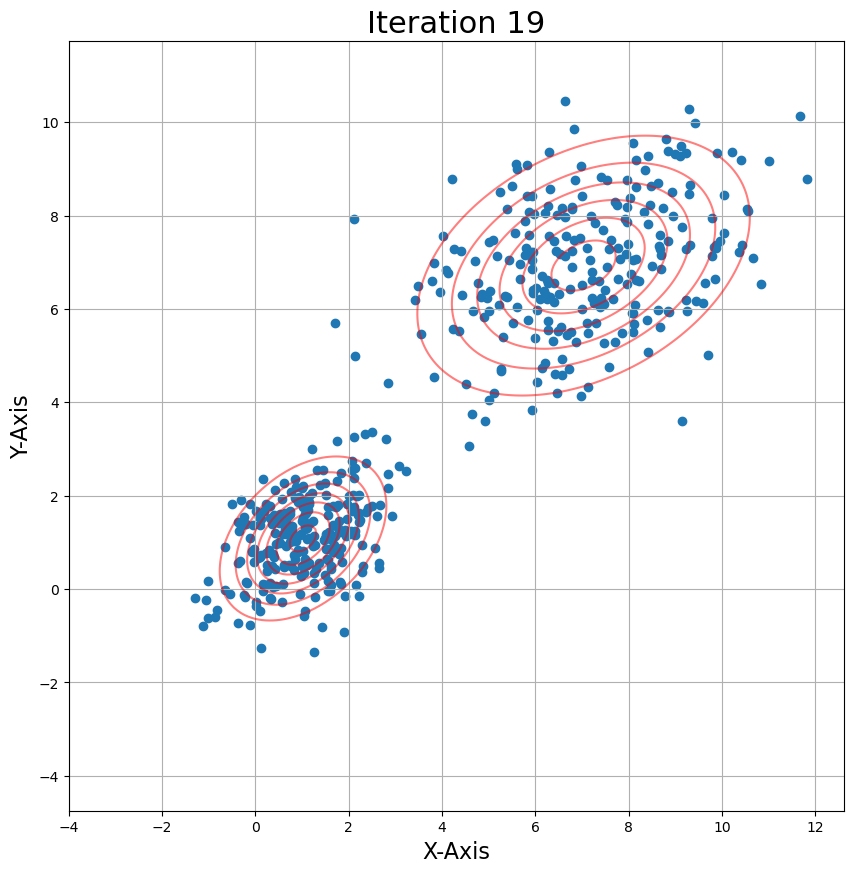

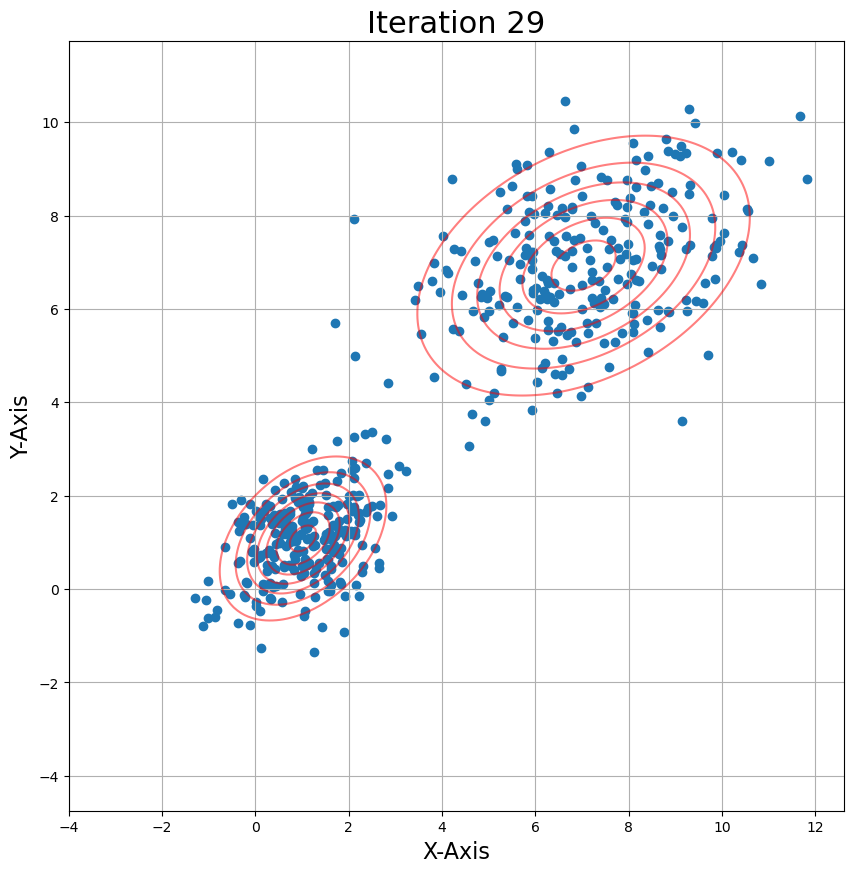

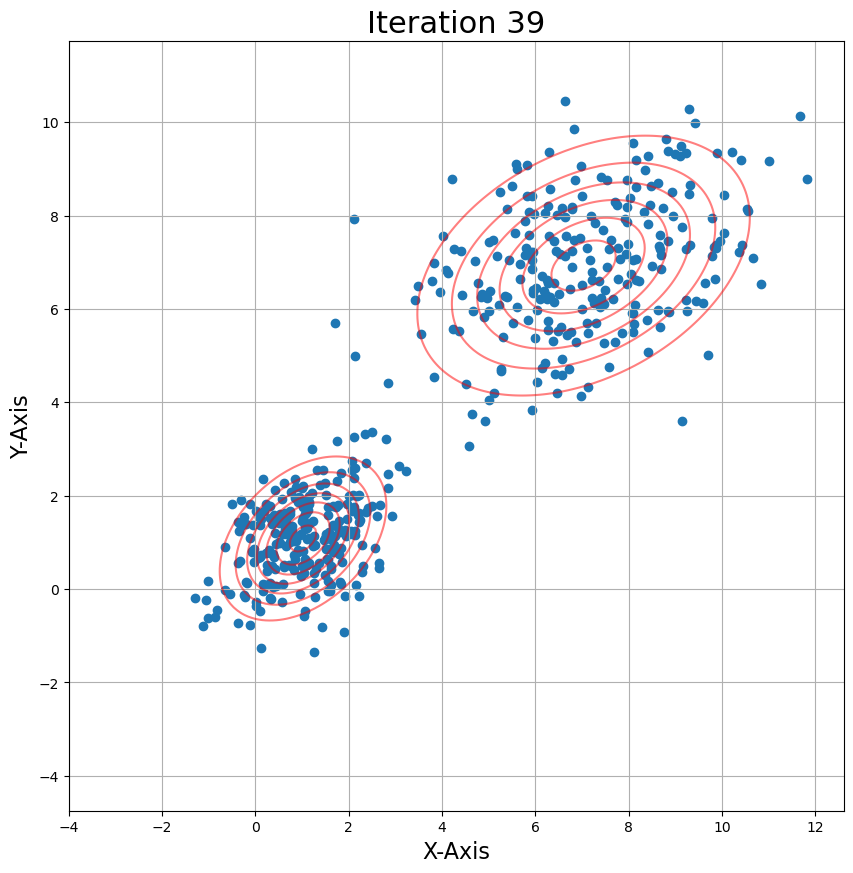

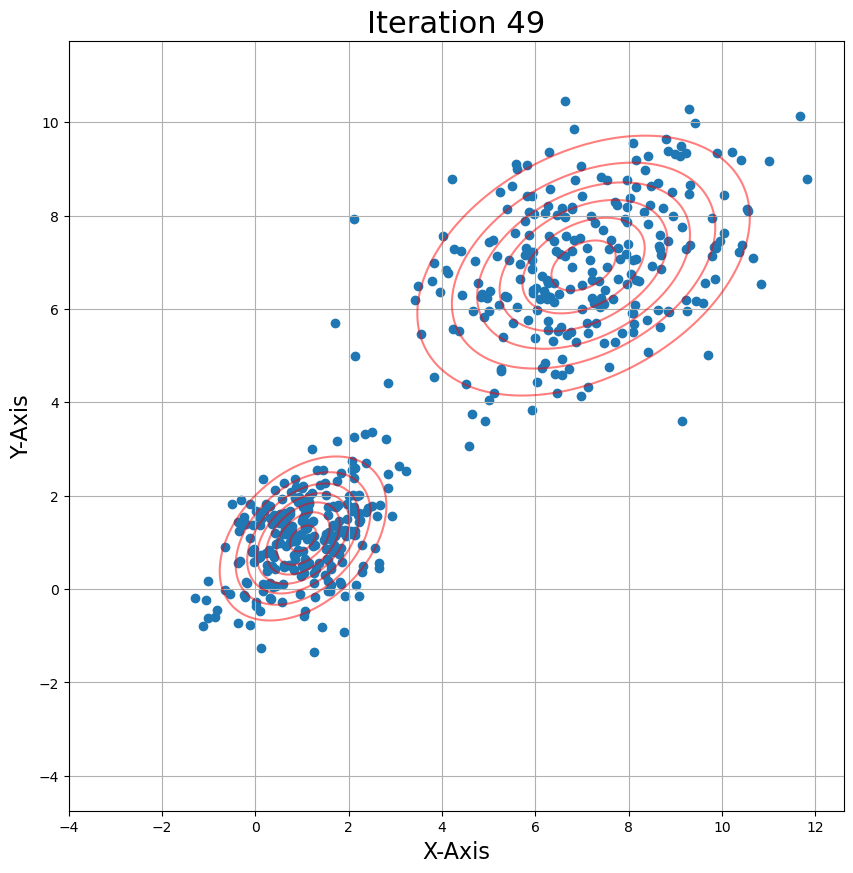

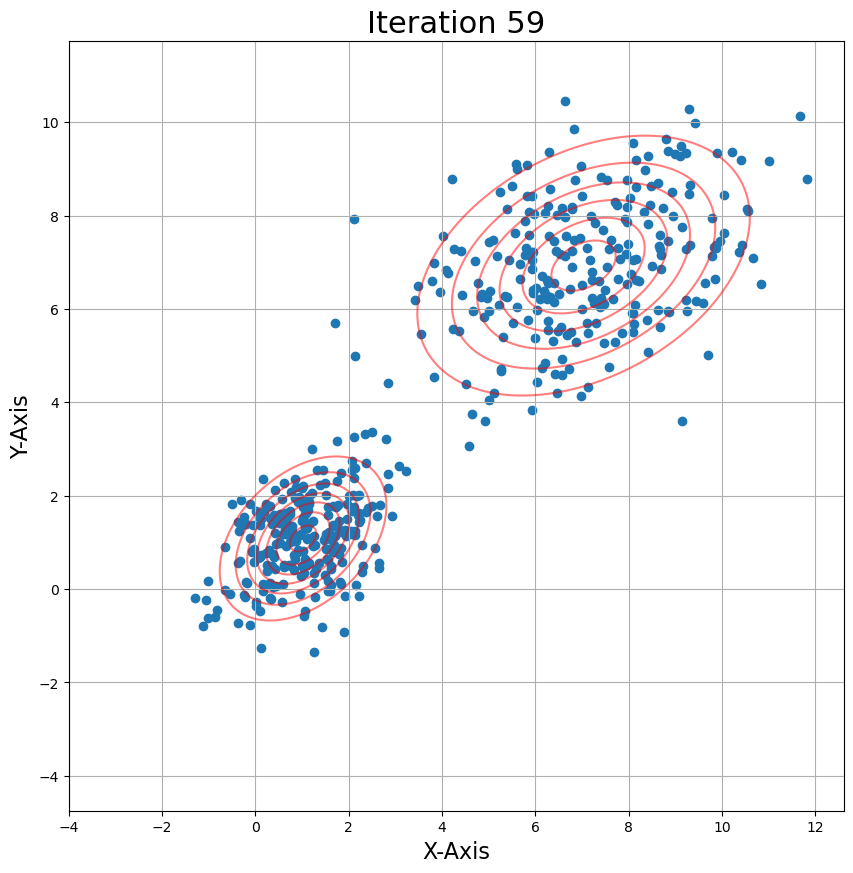

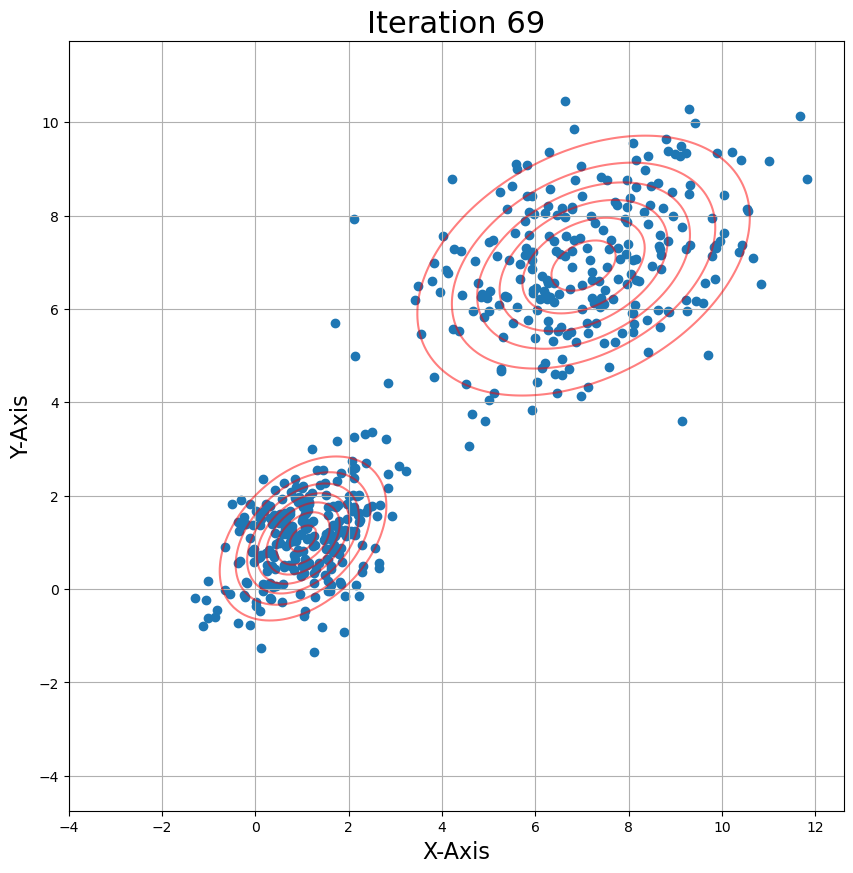

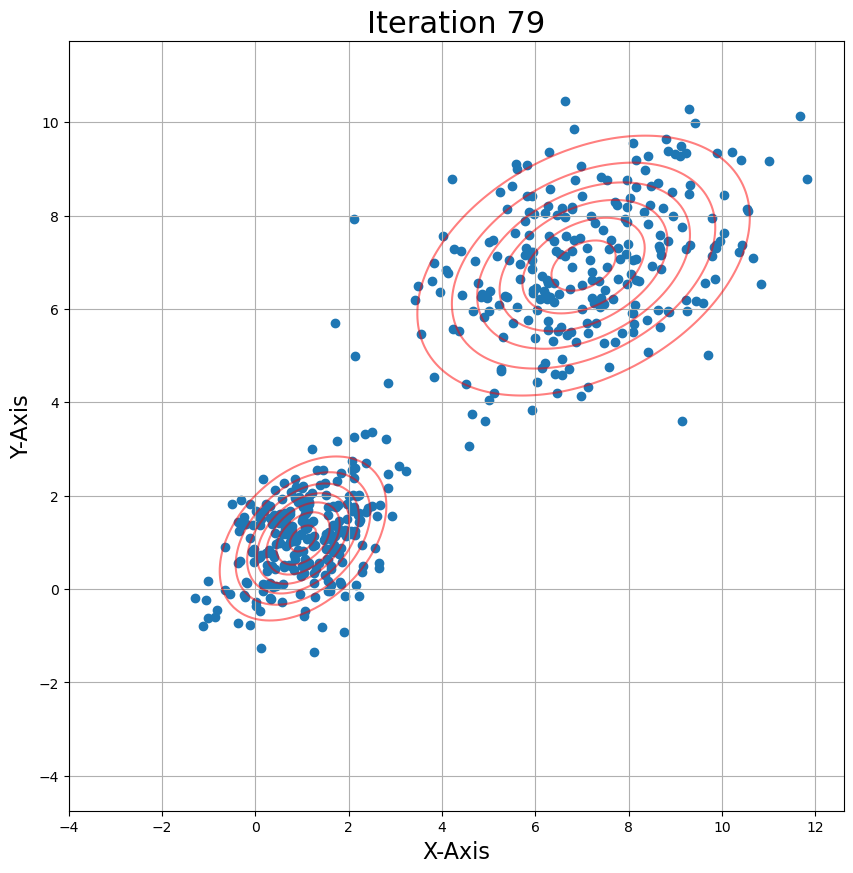

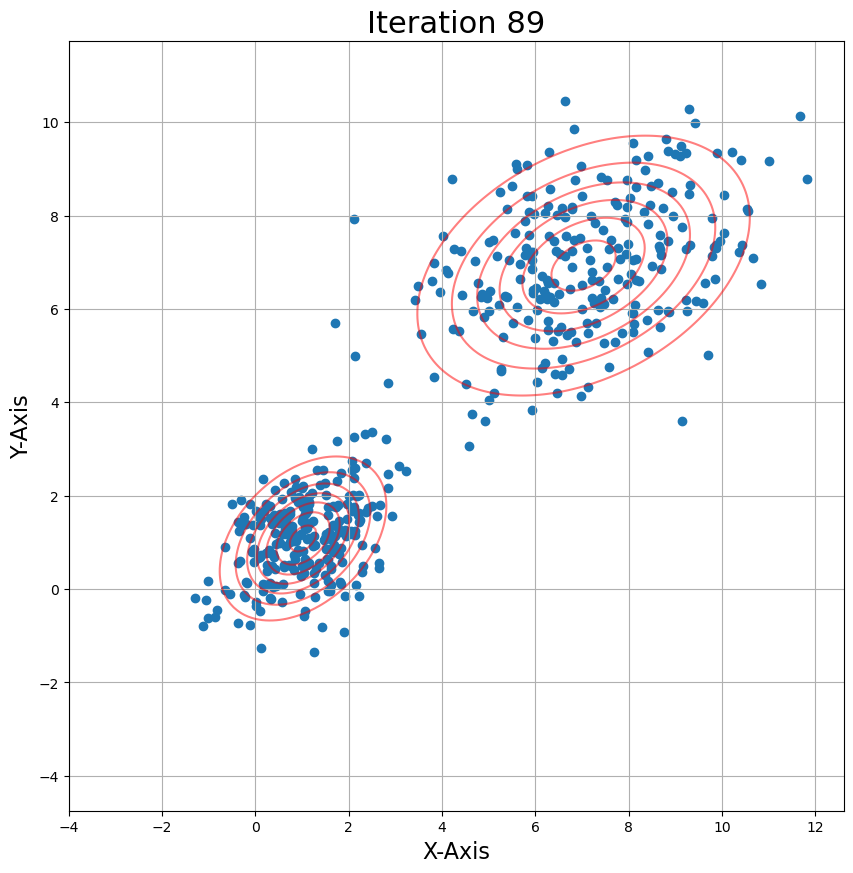

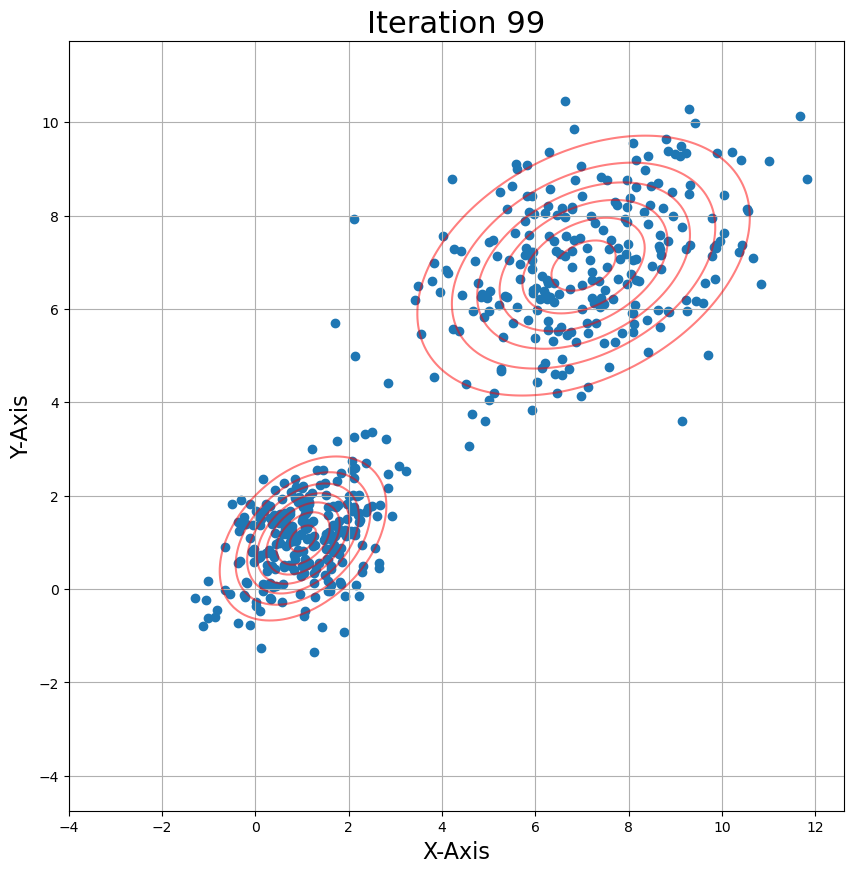

In [2]:
set_means = [[1, 1], [7, 7]]
set_cov = [[[1, 0.5], [0.5, 1]], [[2, -1], [3, 2]]]

#samples = np.empty(np.shape(set_means))
x = np.empty(np.shape(set_means))

for i in range(len(set_means)):
    x  = np.random.multivariate_normal(set_means[i], set_cov[i], size = 250)
    if i == 0:
        samples = np.empty(np.shape(set_means))
    samples = np.concatenate((samples, x), axis=0)


plt.figure(figsize=(10,10))                                 
plt.scatter(samples[:,0], samples[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Ground Truth', fontsize=22)    
plt.grid()            
plt.show()

em_alg(samples, 100, 2)
